In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [4]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Some Visualization

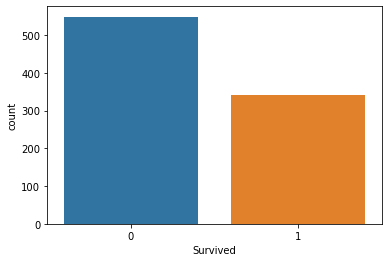

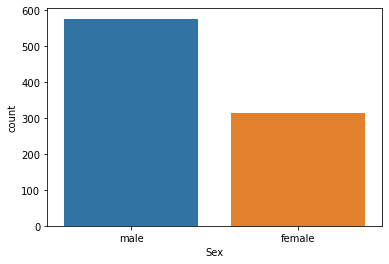

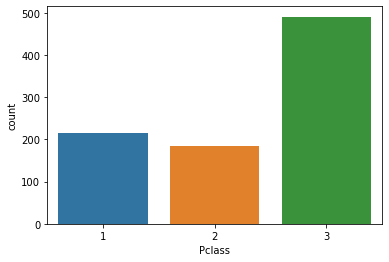

In [7]:
#in this step we will visualize our variables thats why we need a function.
def count_plot(feature):    
    # visualize
    sns.countplot(x=feature,data=df)
    plt.show()
    print("\n\n")
    

#choosing the vairables that will be visualized
categories = ["Survived","Sex","Pclass"]
for x in categories:
    count_plot(x)

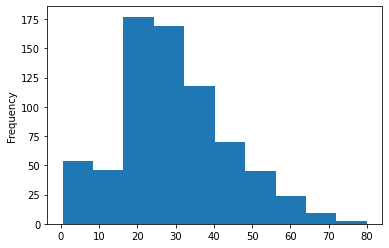

In [8]:
#displaying the age-range of passengers as we see most of the passengers are between 20-40\age
df["Age"].plot.hist()

In [9]:
#mean of Age and Sum of Survived persons by Gender-Sex
df.groupby("Sex").agg({"Age":"mean",
                      "Survived":"sum",})

,Age,Survived
Sex,,
female,27.915709,233
male,30.726645,109


# Data Pre-Processing 

In [10]:
#now he have to clean our dataset for modeling,
#thats why those features which are not so important for our modeling should be deleted and we did :)
df.drop(["Name","Ticket","Cabin","PassengerId"],axis=1,inplace=True)
#Now we are going to delete the rows-columns which has NaN(Not a Number)
df.dropna(inplace=True) 

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
# Visualize datatypes of each column before training stage
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

### Dealing with Categorical data
* Nominal data

In [13]:
# convert nominal data into numerical data 
sex=pd.get_dummies(df["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [14]:
df.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [15]:
# convert nominal data 
embark=pd.get_dummies(df["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [16]:
# convert nominal data 
pclass=pd.get_dummies(df["Pclass"],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [17]:
#we have changed the some features into get_dummies,so we dont need them anymore thats why they will be removed.
df.drop(["Sex","Embarked","Pclass"],inplace=True, axis=1)
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [18]:
#adding get_dummies variables to our dataset
df=pd.concat([df,sex,embark,pclass],axis=1)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [20]:
df.dtypes
# features turned into numerical data so we can go to next step

Survived      int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male          uint8
Q             uint8
S             uint8
2             uint8
3             uint8
dtype: object

## Classification

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [22]:
# independent data
X=df.drop("Survived",axis=1)
# dependent data
y=df["Survived"]

In [23]:
#dividing the dataset into test and train and its size
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)

* Naive Bayes Algorithm

In [26]:
gnb=GaussianNB()    
gnb.fit(X_train,y_train)
y_predict=gnb.predict(X_test)    
gnb_acc = accuracy_score(y_test, y_predict)
print("Decision Tree accuracy:", gnb_acc)

Decision Tree accuracy: 0.7663551401869159


* KNN Algorithm

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN accuracy:", knn_acc)

KNN accuracy: 0.6308411214953271


* Kmeans Algorithm

In [28]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
kmeans_pred = kmeans.predict(X_test)
kmeans_acc = accuracy_score(y_test, kmeans_pred)
print("K-means accuracy:", kmeans_acc)

K-means accuracy: 0.11214953271028037


* Decision Tree Algorithm 

In [29]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
print("Decision Tree accuracy:", dtc_acc)

Decision Tree accuracy: 0.7710280373831776


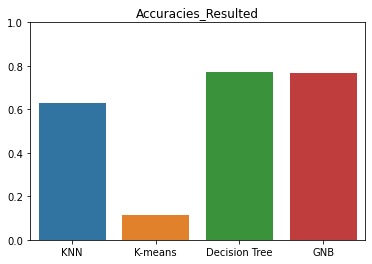

In [31]:
models = ['KNN', 'K-means', 'Decision Tree','GNB']
accuracies = [knn_acc, kmeans_acc, dtc_acc,gnb_acc]
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.title('Accuracies_Resulted')
plt.show()